In [85]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from datetime import timedelta
import operator
plt.style.use('seaborn')
%matplotlib inline

In [86]:
#Load confirmed_cases Dataset
confirmed_cases = pd.read_csv('Datasets/time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [87]:
#Load deaths_reported Dataset
deaths_reported = pd.read_csv('Datasets/time_series_covid19_deaths_global.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [88]:
#Load deaths_reported Dataset
recovered_cases = pd.read_csv('Datasets/time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,150,166,179,188,188,207,220,228,252,260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,345,356,385,394,403,410,422,431,455,470
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,282,309,333,344,344,344,385,398,423,468
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,7,7


In [89]:
#Extracting only Dates columns that have information of confirmed,Deaths
cols = confirmed_cases.keys()
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recovered = recovered_cases.loc[:, cols[1]:cols[-1]]

In [90]:
#Finding the total confirmed cases, death cases and the recovered cases and append them to an 3 empty lists
#Also, calculate the total mortality rate which is the death_sum/confirmed_cases
#Active cases = confirmed - deaths - recoveries 

dates = confirmed.keys()
world_cases = []
total_deaths = []
total_recovered = []
mortality_rate = []
active_cases = []

china_cases = []
italy_cases = []
us_cases = []
india_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    active_cases.append(confirmed_sum-recovered_sum-death_sum)
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())

In [91]:
#Convert all the dates and the cases in the form of numpy array
days_since_jan_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)

In [92]:
#Future forecasting for the next 20 days
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [93]:
#Covert all the integers into datatime for better visualization
start = '22/1/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

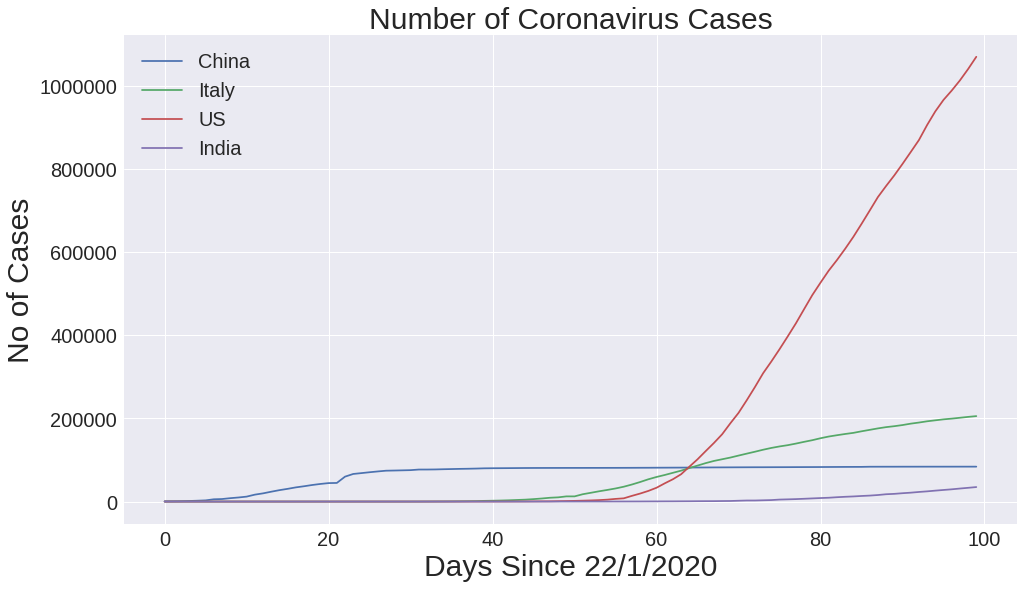

In [94]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases',size=30)
plt.xlabel('Days Since 22/1/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'India'], prop={'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [95]:
# Splitting Dataset
X_train_confirmed, X_test_confirmed, Y_train_confirmed, Y_test_confirmed = train_test_split(days_since_jan_22, world_cases, test_size=0.30, shuffle=False)

X1_train_confirmed, X1_test_confirmed, Y1_train_confirmed, Y1_test_confirmed = train_test_split(days_since_jan_22, active_cases, test_size=0.30, shuffle=False)

X2_train_confirmed, X2_test_confirmed, Y2_train_confirmed, Y2_test_confirmed = train_test_split(days_since_jan_22, total_deaths, test_size=0.30, shuffle=False)

In [96]:
#transform our data for polynomial regression
poly = PolynomialFeatures(degree = 3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [97]:
#Polynomial Regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, Y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)

linear1_model = LinearRegression(normalize=True, fit_intercept=False)
linear1_model.fit(poly_X_train_confirmed, Y1_train_confirmed)
test1_linear_pred = linear1_model.predict(poly_X_test_confirmed)
linear1_pred = linear1_model.predict(poly_future_forecast)

linear2_model = LinearRegression(normalize=True, fit_intercept=False)
linear2_model.fit(poly_X_train_confirmed, Y2_train_confirmed)
test2_linear_pred = linear2_model.predict(poly_X_test_confirmed)
linear2_pred = linear2_model.predict(poly_future_forecast)


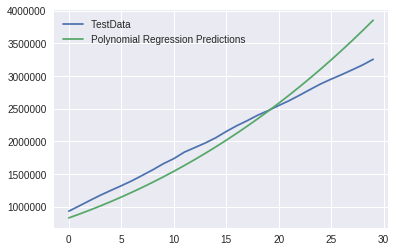

In [98]:
plt.plot(Y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['TestData', 'Polynomial Regression Predictions'])

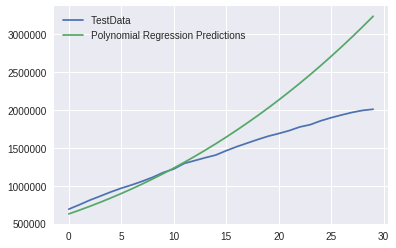

In [99]:
plt.plot(Y1_test_confirmed)
plt.plot(test1_linear_pred)
plt.legend(['TestData', 'Polynomial Regression Predictions'])

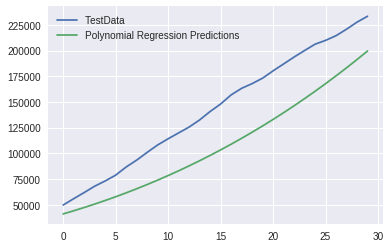

In [100]:
plt.plot(Y2_test_confirmed)
plt.plot(test2_linear_pred)
plt.legend(['TestData', 'Polynomial Regression Predictions'])

In [101]:
# Predicitons for the next 20 days using Polynomial Linear Regression
print('Next 20  days Predictions using polynomial Linear Regression')
linear_pred[-20:]
df = pd.DataFrame(list(zip(future_forecast_dates[-20:], linear_pred[-20:])), 
               columns =['Date', 'ConfirmedCases']) 
df 

Next 20  days Predictions using polynomial Linear Regression


,Date,ConfirmedCases
0,01/05/2020,[4016502.4174010735]
1,02/05/2020,[4183584.650124598]
2,03/05/2020,[4355244.842583609]
3,04/05/2020,[4531544.132786437]
4,05/05/2020,[4712543.658741411]
5,06/05/2020,[4898304.5584568605]
6,07/05/2020,[5088887.969941117]
7,08/05/2020,[5284355.031202506]
8,09/05/2020,[5484766.880249361]
9,10/05/2020,[5690184.655090007]


In [102]:
# Predicitons for the next 20 days using Polynomial Linear Regression
print('Next 20 days active cases Predictions using polynomial Linear Regression')
df1 = pd.DataFrame(list(zip(future_forecast_dates[-20:], linear1_pred[-20:])), 
               columns =['Date', 'Active']) 
df1 

Next 20 days active cases Predictions using polynomial Linear Regression


,Date,Active
0,01/05/2020,3.378333e+06
1,02/05/2020,3.524473e+06
2,03/05/2020,3.674718e+06
3,04/05/2020,3.829125e+06
4,05/05/2020,3.987749e+06
5,06/05/2020,4.150646e+06
6,07/05/2020,4.317870e+06
7,08/05/2020,4.489480e+06
8,09/05/2020,4.665528e+06
9,10/05/2020,4.846073e+06


In [103]:
# Predicitons for the next 20 days using Polynomial Linear Regression
print('Next 20 days deaths Predictions using polynomial Linear Regression')
df2 = pd.DataFrame(list(zip(future_forecast_dates[-20:], linear2_pred[-20:])), 
               columns =['Date', 'Deaths']) 
df2

Next 20 days deaths Predictions using polynomial Linear Regression


,Date,Deaths
0,01/05/2020,[208074.39729441862]
1,02/05/2020,[216833.84519441484]
2,03/05/2020,[225833.161298609]
3,04/05/2020,[235075.53127176058]
4,05/05/2020,[244564.14077862882]
5,06/05/2020,[254302.1754839733]
6,07/05/2020,[264292.82105255313]
7,08/05/2020,[274539.26314912795]
8,09/05/2020,[285044.68743845704]
9,10/05/2020,[295812.2795852997]


In [104]:
def sigmoid_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def gaussian_model(x,a,b,c):
    return a * np.exp(-0.5 * ((x-b)/c)**2)

from scipy.optimize import curve_fit
from scipy.optimize import fsolve


x=np.reshape(future_forecast, future_forecast.size)

y=np.reshape(linear_pred, linear_pred.size)

y1=np.reshape(linear1_pred, linear1_pred.size)

y2=np.reshape(linear2_pred, linear2_pred.size)

popt, pcov = curve_fit(sigmoid_model,x,y,p0=[4, 150, 5000000], maxfev=9999)

popt1, pcov1 = curve_fit(gaussian_model,x,y1,p0=[4, 150, 5000000], maxfev=9999)

popt2, pcov2 = curve_fit(sigmoid_model,x,y2,p0=[2, 100, 1000000], maxfev=9999)

speed_error, x_peak_error, y_max_error = [np.sqrt(pcov[i][i]) for i in [0, 1, 2]]

sol = int(fsolve(lambda x : sigmoid_model(x,popt[0],popt[1],popt[2]) - int(popt[2]),popt[1]))

last_death = int(fsolve(lambda x : sigmoid_model(x,popt2[0],popt2[1],popt2[2]) - int(popt2[2]),popt2[1]))

pred_x = list(range(max(x),sol))

active = [gaussian_model(i,popt1[0],popt1[1],popt1[2]) for i in list(x)+pred_x]

active.index(max(active))

x_full = list(x)+pred_x


print("Peak Date:", datetime.datetime.strptime(start, '%d/%m/%Y') + timedelta(days=x_full[active.index(max(active))]))

print("End Date:", datetime.datetime.strptime(start, '%d/%m/%Y') + timedelta(days=sol))

Peak Date: 2020-06-26 00:00:00
End Date: 2021-02-07 00:00:00


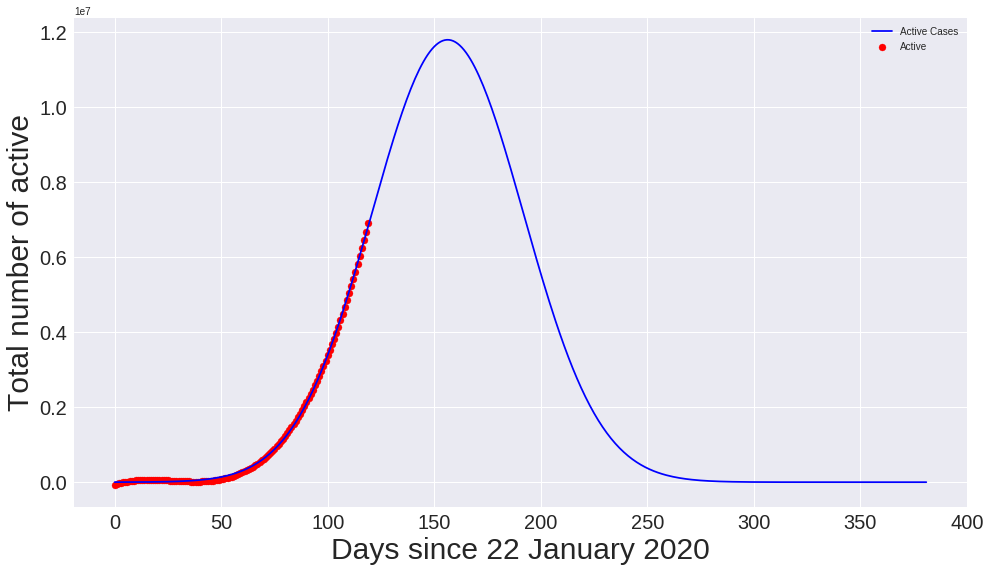

In [105]:
pred_x = list(range(max(x),sol))
plt.figure(figsize=(16, 9))
plt.scatter(x,y1,label="Active",color="red")
plt.plot(list(x)+pred_x, [gaussian_model(i,popt1[0],popt1[1],popt1[2]) for i in list(x)+pred_x], label="Active Cases", color='blue')
plt.legend()
plt.xlabel("Days since 22 Jan 2020",size=30)
plt.ylabel("Total number of active",size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()